# Analyse GEOtop maps
---
Author: Elisa Bortoli (elisa.bortoli3@gmail.com) 

Date: 28/03/2019

## Load DEM

In [1]:
import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt

import os
plt.ion()

from shapely.geometry import Polygon, mapping
from rasterio.mask import mask

# set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (8, 8)


In [2]:
# open DEM map
test_path = "/home/elisa/Scrivania/MHPC/geotop_3.0/tests/3D/small_example/"
file_path = test_path + "input_maps/pit.asc"

with rio.open(file_path) as src:
    
    # convert/read the data into a numpy array
    example_dem_in = src.read()
    
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    
    # get bounds of object
    bounds = src.bounds

# print
example_dem_in

array([[[-9999., -9999., -9999., -9999.,  1500., -9999., -9999., -9999.],
        [-9999.,  1300.,  1350.,  1450.,  1480.,  1450.,  1480.,  1490.],
        [-9999.,  1280.,  1320.,  1400.,  1430.,  1450.,  1460., -9999.],
        [-9999.,  1250.,  1300.,  1350.,  1380.,  1410.,  1450., -9999.],
        [ 1230.,  1220.,  1210.,  1250.,  1330.,  1380.,  1400., -9999.],
        [ 1210.,  1200.,  1200.,  1220.,  1300.,  1340.,  1350., -9999.],
        [ 1200.,  1170.,  1150.,  1200.,  1210.,  1220.,  1250., -9999.],
        [ 1160.,  1150.,  1140.,  1110.,  1120.,  1130.,  1150., -9999.],
        [ 1100.,  1080.,  1070.,   980.,   990.,  1000.,  1050., -9999.],
        [ 1070.,  1050.,  1010.,   950.,   960.,   980.,   990., -9999.],
        [-9999., -9999., -9999.,   910.,   920.,   940.,   945., -9999.]]],
      dtype=float32)

### MeteoIO

In [18]:
# dem.toString()
example_dem_in_meteoio = [ 
    -999, -999, -999, 910, 920, 940, 945, -999, 
    1070, 1050, 1010, 950, 960, 980, 990, -999, 
    1100, 1080, 1070, 980, 990, 1000, 1050, -999,
    1160, 1150, 1140, 1110, 1120, 1130, 1150, -999,
    1200, 1170, 1150, 1200, 1210, 1220, 1250, -999, 
    1210, 1200, 1200, 1220, 1300, 1340, 1350, -999, 
    1230, 1220, 1210, 1250, 1330, 1380, 1400, -999, 
    -999, 1250, 1300, 1350, 1380, 1410, 1450, -999, 
    -999, 1280, 1320, 1400, 1430, 1450, 1460, -999, 
    -999, 1300, 1350, 1450, 1480, 1450, 1480, 1490, 
    -999, -999, -999, -999, 1500, -999, -999, -999 ]

In [ ]:
# for loop
example_dem_in_meteoio_2 = [
-999 1070 1100 1160 1200 1210 1230 -999 
-999 1050 1080 1150 1170 1200 1220 1250 
-999 1010 1070 1140 1150 1200 1210 1300 
910 950 980 1110 1200 1220 1250 1350 
920 960 990 1120 1210 1300 1330 1380 
940 980 1000 1130 1220 1340 1380 1410 
945 990 1050 1150 1250 1350 1400 1450 
-999 -999 -999 -999 -999 -999 -999 -999 
1070 1100 1160 1200 1210 1230 -999 -999 
1050 1080 1150 1170 1200 1220 1250 1280 
1010 1070 1140 1150 1200 1210 1300 1320]

In [ ]:
example_dem_in_meteoio_3 =[
-999 -999 -999 910 920 940 945 -999 
1070 1050 1010 950 960 980 990 -999 
1100 1080 1070 980 990 1000 1050 -999 
1160 1150 1140 1110 1120 1130 1150 -999 
1200 1170 1150 1200 1210 1220 1250 -999 
1210 1200 1200 1220 1300 1340 1350 -999 
1230 1220 1210 1250 1330 1380 1400 -999 
-999 1250 1300 1350 1380 1410 1450 -999 
-999 1280 1320 1400 1430 1450 1460 -999 
-999 1300 1350 1450 1480 1450 1480 1490 
-999 -999 -999 -999 1500 -999 -999 -999 
]

## Analyze  DEM

In [4]:
# print Spatial Extents (format wanted by matplotlib)
print('(xll, xur, yll, yur) = \t\t\t', spatial_extent)

# print Bounds (format provided by rasterio)
print('(xll, yll, xur, yur) = ', bounds)

(xll, xur, yll, yur) = 			 (641250.0, 645250.0, 5005750.0, 5011250.0)
(xll, yll, xur, yur) =  BoundingBox(left=641250.0, bottom=5005750.0, right=645250.0, top=5011250.0)


In [5]:
with rio.open('/home/elisa/Scrivania/MHPC/geotop_3.0/tests/3D/small_example/input_maps/pit.asc') as src:
    
    # convert/read the data into a numpy array: masked=True turns "nodata" values to nan
    example_dem_in = src.read(1, masked=True)
    
example_dem_in

masked_array(
  data=[[--, --, --, --, 1500.0, --, --, --],
        [--, 1300.0, 1350.0, 1450.0, 1480.0, 1450.0, 1480.0, 1490.0],
        [--, 1280.0, 1320.0, 1400.0, 1430.0, 1450.0, 1460.0, --],
        [--, 1250.0, 1300.0, 1350.0, 1380.0, 1410.0, 1450.0, --],
        [1230.0, 1220.0, 1210.0, 1250.0, 1330.0, 1380.0, 1400.0, --],
        [1210.0, 1200.0, 1200.0, 1220.0, 1300.0, 1340.0, 1350.0, --],
        [1200.0, 1170.0, 1150.0, 1200.0, 1210.0, 1220.0, 1250.0, --],
        [1160.0, 1150.0, 1140.0, 1110.0, 1120.0, 1130.0, 1150.0, --],
        [1100.0, 1080.0, 1070.0, 980.0, 990.0, 1000.0, 1050.0, --],
        [1070.0, 1050.0, 1010.0, 950.0, 960.0, 980.0, 990.0, --],
        [--, --, --, 910.0, 920.0, 940.0, 945.0, --]],
  mask=[[ True,  True,  True,  True, False,  True,  True,  True],
        [ True, False, False, False, False, False, False, False],
        [ True, False, False, False, False, False, False,  True],
        [ True, False, False, False, False, False, False,  True],
     

In [6]:
# print DEM infos
print("(rows, cols) = ", example_dem_in.shape)
print("object type = ", type(example_dem_in))


(rows, cols) =  (11, 8)
object type =  <class 'numpy.ma.core.MaskedArray'>


## Plot DEM

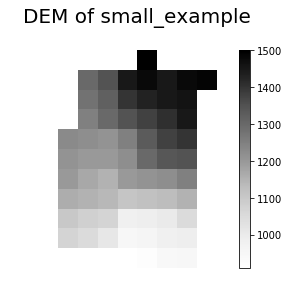

In [9]:
fig, ax = plt.subplots(figsize = (8,4))
example_dem_plot = ax.imshow(example_dem_in, 
                       cmap='Greys', 
                       extent=spatial_extent)
ax.set_title("DEM of small_example\n", fontsize = 20)
fig.colorbar(example_dem_plot)

# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()


### Explore DEM Values with Histograms

In [ ]:
# Prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("white")

In [ ]:
# use seaborn styles
sns.set_style("whitegrid")

# Plot histogram
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(example_dem_in.ravel(),
        bins=100, 
        color='purple')
ax.set_title("DEM", fontsize = 20);

## Adjust Plot Extent to “Zoom in” 

In [ ]:
# full spatial extent 
print("(xll, xur, yll, yur)full = ", spatial_extent)

# smaller spatial extent
zoomed_extent = [643000, 644000, 5006000, 5008000]
print("(xll, xur, yll, yur)zoom =", zoomed_extent)


In [ ]:
# plot the original data with the boundary box
fig, ax = plt.subplots(figsize = (8,4))
example_dem_plot = ax.imshow(example_dem_in, 
                             extent=spatial_extent)
ax.set_title("DEM - Full Spatial Extent\n", fontsize = 20)
fig.colorbar(example_dem_plot)
ax.set_axis_off()


In [ ]:
print("(xlimits)zoom = " , zoomed_extent[:2]) # 0 <= x < 2
print("(ylimits)zoom = " , zoomed_extent[2:4]) # 2 <= x < 4

In [ ]:
# plot the data but set the x and y lim
fig, ax = plt.subplots(figsize = (8,4))
ax.imshow(example_dem_in,
          extent=spatial_extent)
ax.set_title("DEM- Zoomed Spatial Extent\n")

# set x and y limits of the plot
ax.set_xlim(zoomed_extent[:2])
ax.set_ylim(zoomed_extent[2:4])

ax.set_axis_off()